In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
import os
import time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import average_precision_score
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


ImportError: ignored

In [ ]:
dataset = pd.read_csv("Dataset_heart rate_retail stores.csv") #load training data
dataset.columns

Index(['Id', 'age', 'gender', 'BMI', 'sleeping_time',
       'sporting_activity_(h/week)', 'daytime', 'outdoor_temperature',
       'shopping_cart', 'attendants', 'shopping_frequency', 'cash_point',
       'shopping_amount', 'weekday', 'smoking', 'ex_max', 'ex_min', 'hr_max',
       'max_time', 'hr_min', 'min_time', 'shopping duration (in minutes)',
       'reaching HRmax'],
      dtype='object')

In [ ]:
dataset.head()

,Id,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
0,1,55,female,30.0,7.0,2.0,noon,23,no,no,...,monday,0,115,71,95,8,72,4,12,0
1,2,25,female,18.4,9.0,1.0,noon,23,yes,no,...,monday,1,110,82,112,24,70,18,26,0
2,3,38,male,25.1,5.0,3.0,noon,23,no,no,...,monday,0,116,74,115,18,75,20,24,0
3,4,21,female,22.6,8.0,0.0,evening,23,yes,family,...,monday,1,146,55,122,26,62,41,46,0
4,5,30,female,21.7,12.0,10.0,evening,23,yes,life partner,...,monday,0,111,44,120,39,61,20,41,1


In [ ]:
dataset.describe()

,Id,age,BMI,sleeping_time,sporting_activity_(h/week),outdoor_temperature,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,84.727273,40.278788,25.183636,7.230303,2.857576,21.090909,0.369697,115.109091,72.600000,117.690909,22.181818,63.236364,17.333333,35.436364,0.503030
std,48.777664,14.241638,4.217057,1.345155,2.665158,3.552426,0.484192,14.192070,13.347056,13.270460,17.678109,11.166091,17.559423,19.254170,0.501513
min,1.000000,18.000000,16.600000,3.000000,0.000000,12.000000,0.000000,70.000000,44.000000,80.000000,1.000000,43.000000,1.000000,6.000000,0.000000
25%,43.000000,29.000000,22.200000,6.000000,1.000000,18.000000,0.000000,106.000000,65.000000,109.000000,8.000000,55.000000,6.000000,22.000000,0.000000
50%,85.000000,40.000000,25.000000,7.000000,2.000000,21.000000,0.000000,116.000000,72.000000,118.000000,17.000000,64.000000,13.000000,33.000000,1.000000
75%,127.000000,52.000000,27.700000,8.000000,4.000000,23.000000,1.000000,124.000000,80.000000,124.000000,32.000000,72.000000,23.000000,46.000000,1.000000
max,168.000000,72.000000,37.600000,12.000000,14.000000,28.000000,1.000000,148.000000,120.000000,163.000000,86.000000,88.000000,150.000000,98.000000,1.000000


In [ ]:
dataset.shape

(165, 23)

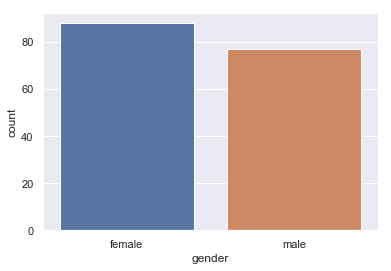

In [ ]:
sns.countplot(dataset['gender'],label="Count")

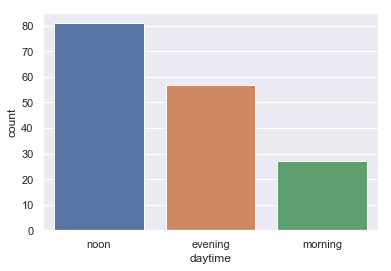

In [ ]:
sns.countplot(dataset['daytime'],label="Count")

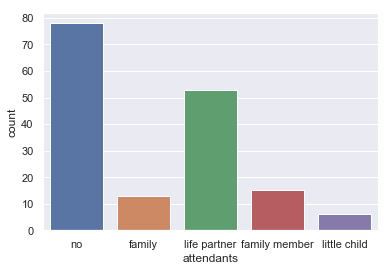

In [ ]:
sns.countplot(dataset['attendants'],label="Count")

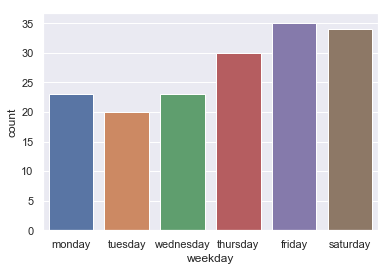

In [ ]:
sns.countplot(dataset['weekday'],label="Count")

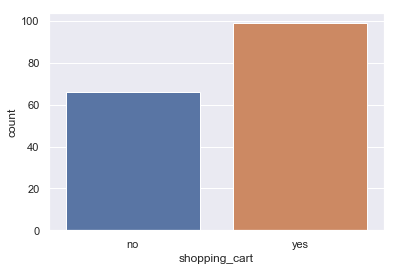

In [ ]:
sns.countplot(dataset['shopping_cart'],label="Count")

In [ ]:
gender = {'female': 0,'male': 1}
dataset.gender = [gender[item] for item in dataset.gender]
daytime = {'noon': 1,'evening': 2,'morning': 3}
dataset.daytime = [daytime[item] for item in dataset.daytime]

In [ ]:
attendants = {'no': 1,'family': 2,'life partner': 3,'family member': 4,'little child': 5}
dataset.attendants = [attendants[item] for item in dataset.attendants]

weekday = {'monday': 1,'tuesday': 2,'wednesday': 3,'thursday': 4,'friday': 5,'saturday': 6}
dataset.weekday = [weekday[item] for item in dataset.weekday]

In [ ]:
shopping_cart = {'no': 0,'yes': 1}
dataset.shopping_cart = [shopping_cart[item] for item in dataset.shopping_cart]

In [ ]:
dataset.head()

,Id,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
0,1,55,0,30.0,7.0,2.0,1,23,0,1,...,1,0,115,71,95,8,72,4,12,0
1,2,25,0,18.4,9.0,1.0,1,23,1,1,...,1,1,110,82,112,24,70,18,26,0
2,3,38,1,25.1,5.0,3.0,1,23,0,1,...,1,0,116,74,115,18,75,20,24,0
3,4,21,0,22.6,8.0,0.0,2,23,1,2,...,1,1,146,55,122,26,62,41,46,0
4,5,30,0,21.7,12.0,10.0,2,23,1,3,...,1,0,111,44,120,39,61,20,41,1


In [ ]:
dataset.columns

Index(['Id', 'age', 'gender', 'BMI', 'sleeping_time',
       'sporting_activity_(h/week)', 'daytime', 'outdoor_temperature',
       'shopping_cart', 'attendants', 'shopping_frequency', 'cash_point',
       'shopping_amount', 'weekday', 'smoking', 'ex_max', 'ex_min', 'hr_max',
       'max_time', 'hr_min', 'min_time', 'shopping duration (in minutes)',
       'reaching HRmax'],
      dtype='object')

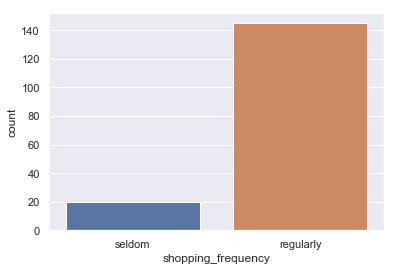

In [ ]:
sns.countplot(dataset['shopping_frequency'],label="Count")

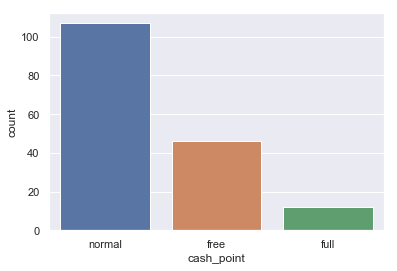

In [ ]:
sns.countplot(dataset['cash_point'],label="Count")

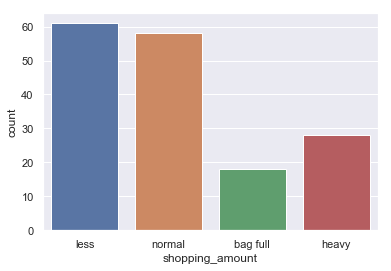

In [ ]:
sns.countplot(dataset['shopping_amount'],label="Count")

In [ ]:
shopping_frequency = {'seldom': 1,'regularly': 1}
dataset.shopping_frequency = [shopping_frequency[item] for item in dataset.shopping_frequency]
cash_point = {'normal': 1,'free': 2,'full': 3}
dataset.cash_point = [cash_point[item] for item in dataset.cash_point]
shopping_amount = {'less': 1,'normal': 2,'bag full': 3,'heavy': 4}
dataset.shopping_amount = [shopping_amount[item] for item in dataset.shopping_amount]

In [ ]:
dataset.head()

,Id,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
0,1,55,0,30.0,7.0,2.0,1,23,0,1,...,1,0,115,71,95,8,72,4,12,0
1,2,25,0,18.4,9.0,1.0,1,23,1,1,...,1,1,110,82,112,24,70,18,26,0
2,3,38,1,25.1,5.0,3.0,1,23,0,1,...,1,0,116,74,115,18,75,20,24,0
3,4,21,0,22.6,8.0,0.0,2,23,1,2,...,1,1,146,55,122,26,62,41,46,0
4,5,30,0,21.7,12.0,10.0,2,23,1,3,...,1,0,111,44,120,39,61,20,41,1


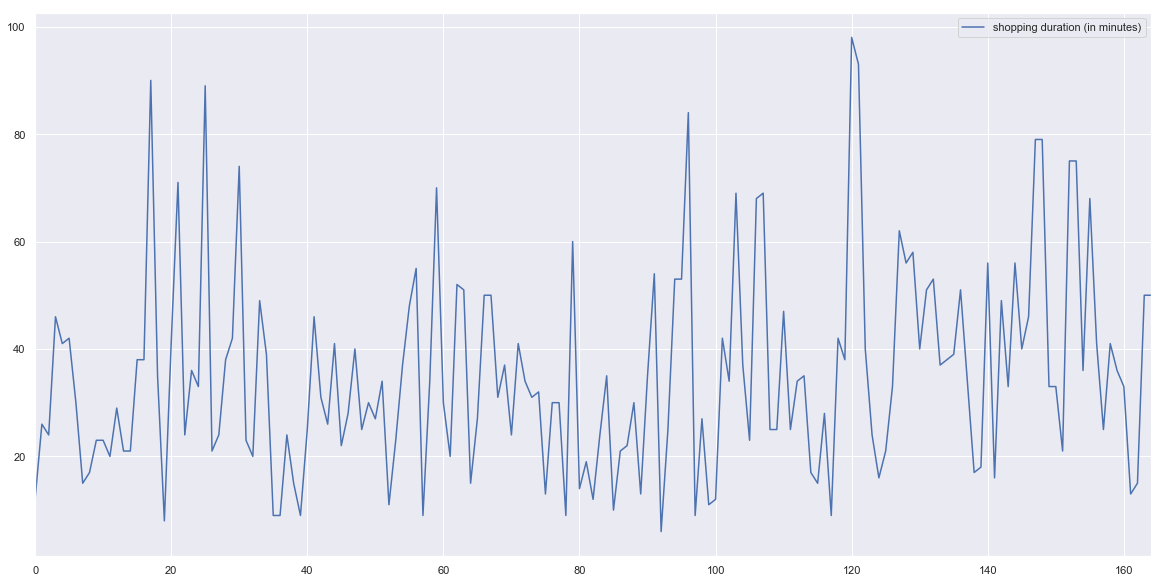

In [ ]:
dataset.plot(y="shopping duration (in minutes)",figsize=(20,10))

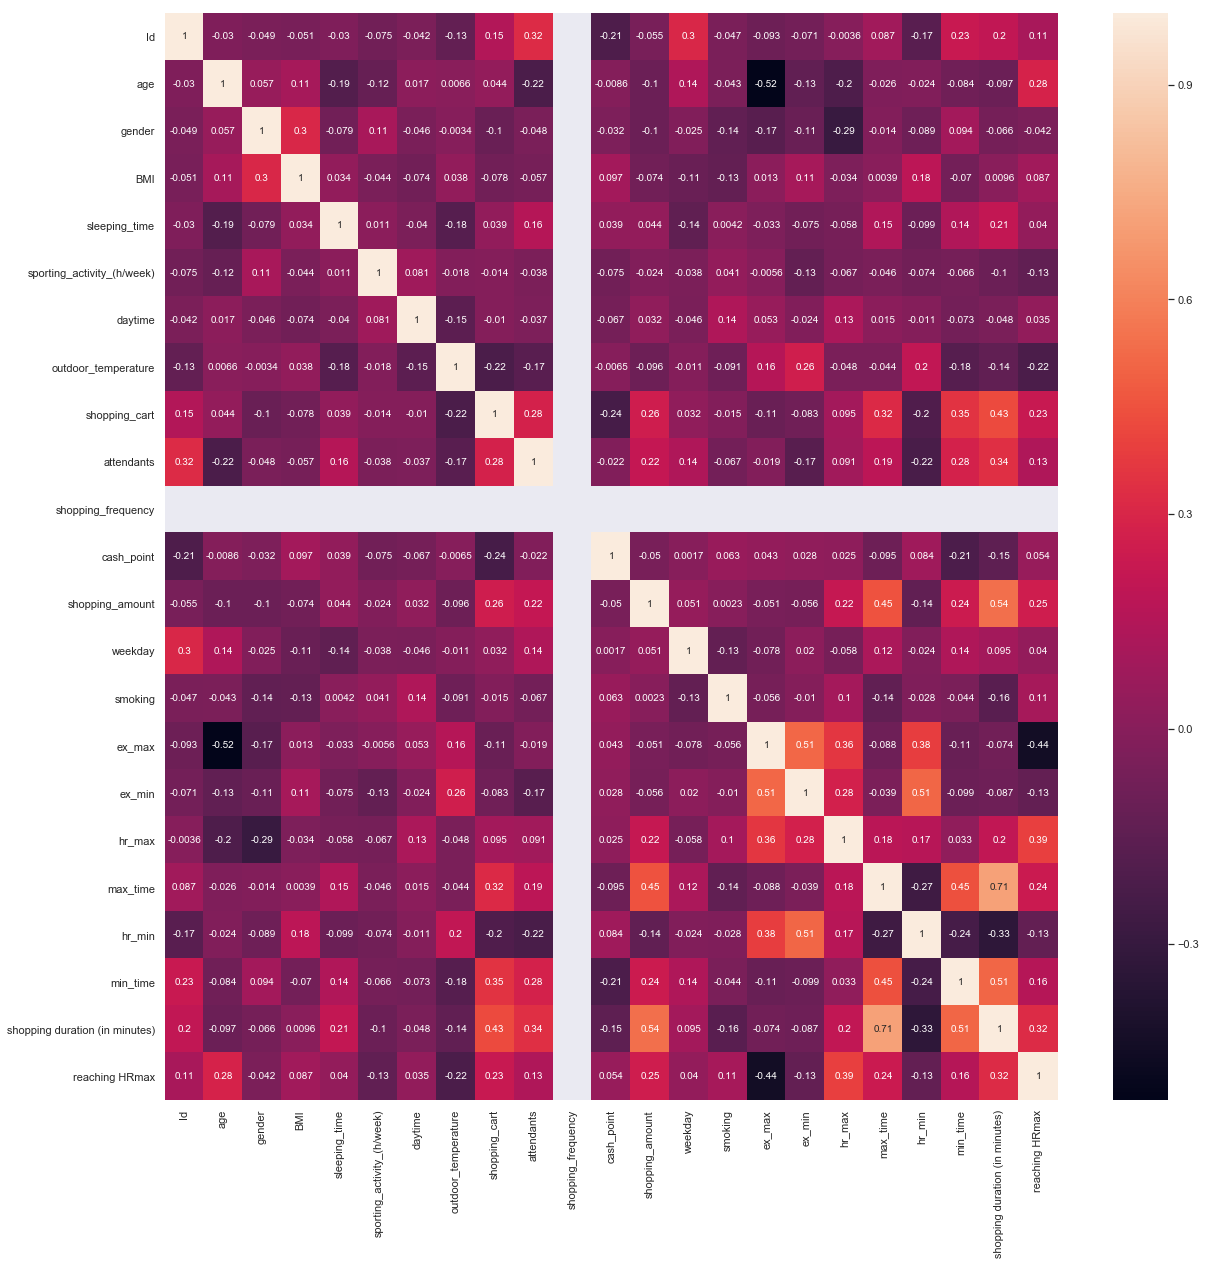

In [ ]:
#heat map (Correlation Matrix)
plt.figure(figsize  =(20,20))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Feature Selection Techniques

If we look at the heat map, we can see that age, gender, sporting_activity, outdoor_temparature, smoking, 
ex_max, ex_min and hr_min are negatively correlated with shopping duration. To confirm more, we can apply
feature importance technique to check Univariate Feature Selection technique to check which independent 
features are most important to our dependent feature (shopping duration).

In [ ]:
#Univariate Feature Selection
X = dataset.iloc[:,1:21]  
y = dataset.iloc[:,-2]   
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  

#Feature Importance
X = dataset.iloc[:,1:21]  
y = dataset.iloc[:,-2]    
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
feat_imp = feat_importances.nlargest(23)
univariate = featureScores.nlargest(23,'Score')

In [ ]:
feat_imp

max_time                      0.083871
sporting_activity_(h/week)    0.074019
age                           0.066422
sleeping_time                 0.062881
weekday                       0.061706
min_time                      0.060479
ex_max                        0.059815
BMI                           0.057512
hr_min                        0.055254
outdoor_temperature           0.054146
ex_min                        0.050568
hr_max                        0.048600
attendants                    0.048142
daytime                       0.046441
shopping_amount               0.045537
smoking                       0.034836
cash_point                    0.034106
gender                        0.031149
shopping_cart                 0.024517
shopping_frequency            0.000000
dtype: float64

In [ ]:
univariate

,Specs,Score
17,max_time,1889.517925
19,min_time,1800.788187
0,age,331.913321
15,ex_min,174.735111
18,hr_min,163.584011
4,sporting_activity_(h/week),163.198834
14,ex_max,129.472031
16,hr_max,95.002185
12,weekday,53.710154
11,shopping_amount,53.483340


Few features such as cash_point, shopping_frequency, gender, shopping_cart, BMI, smoking are not so important
for our dependent variable (shoping duration) according to both feature selection approaches. On the other hand,
independent feature such as max_time, min_time, age, hr_min, ex_min, ex_max, sporting_activity_(h/week),
weekday, attendants, outdoor_temperature, BMI are important for both our response variable. So we only take these
features to predict the shopping duration.

In [ ]:
msk = np.random.rand(len(dataset)) <= 0.7

train = dataset[msk]
test = dataset[~msk]

In [ ]:
X_train = train[['max_time','min_time','age','hr_min','ex_min','ex_max','sporting_activity_(h/week)','weekday','attendants','outdoor_temperature', 'BMI']]
X_test = test[['max_time','min_time','age','hr_min','ex_min','ex_max','sporting_activity_(h/week)','weekday','attendants','outdoor_temperature', 'BMI']]

In [ ]:
Y_train = train['shopping duration (in minutes)']
Y_test = test['shopping duration (in minutes)']

# Machine Learning

1. Linear Regression
2. Support Vector Machine
3. Random Forest
4. Gradient Boosting

# Predicting Shopping Duration

In [ ]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
Y_prediction_LR = LR.predict(X_test)

In [ ]:
LR.score(X_test,Y_test)

0.24482212783041457

In [ ]:
LR.score(X_train, Y_train)

0.6595612765937874

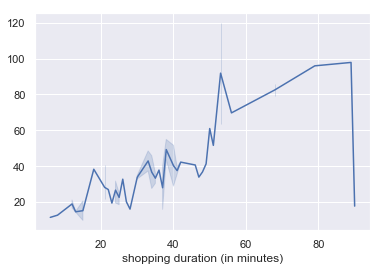

In [ ]:
sns.lineplot(Y_test, Y_prediction_LR)

In [ ]:
#Support Vector Machine
SVMachine = svm.SVR(kernel='rbf')
SVMachine.fit(X_train, Y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
Y_prediction_SVM = SVMachine.predict(X_test)

In [ ]:
SVMachine.score(X_test, Y_test)

-0.028104413675143377

In [ ]:
SVMachine.score(X_train, Y_train)

0.05023682712362676

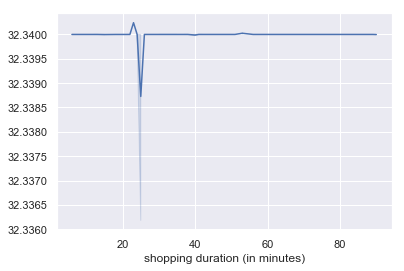

In [ ]:
sns.lineplot(Y_test, Y_prediction_SVM)

In [ ]:
#Random Forest
RF = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, min_samples_leaf=1)

In [ ]:
RF.fit(X_train, Y_train)
Y_prediction_RF = RF.predict(X_test)
RF.score(X_test,Y_test)

0.4663814848718195

In [ ]:
RF.score(X_train, Y_train)

0.5968023646887941

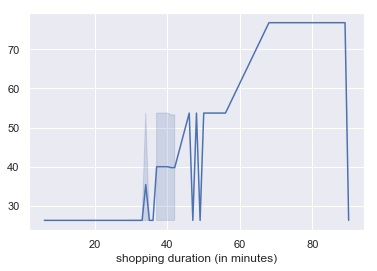

In [ ]:
sns.lineplot(Y_test, Y_prediction_RF)

In [ ]:
#Gradient Boosting
GB = GradientBoostingRegressor()
GB.fit(X_train, Y_train)
Y_prediction_GB = GB.predict(X_test)
GB.score(X_test,Y_test)

0.3486410185522918

In [ ]:
GB.score(X_train, Y_train)

0.992059520940567

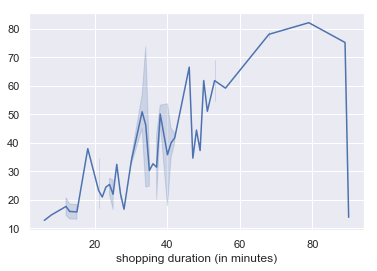

In [ ]:
sns.lineplot(Y_test, Y_prediction_GB)

Machine Learning Accuracy

In [ ]:
print('Training')
print("Linear Regression training Accuracy: {:.3f}".format(LR.score(X_train, Y_train)))
print("Random Forest training Accuracy: {:.3f}".format(RF.score(X_train, Y_train)))
print("Support Vector Machine training Accuracy: {:.3f}".format(SVMachine.score(X_train, Y_train)))
print("Gradient Boosting training Accuracy: {:.3f}".format(GB.score(X_train, Y_train)))

print('')
print('Testing')
print("Linear Regression testing Accuracy: {:.3f}".format(LR.score(X_test,Y_test)))
print("Random Forest testing Accuracy: {:.3f}".format(RF.score(X_test,Y_test)))
print("Support Vector Machine testing Accuracy: {:.3f}".format(SVMachine.score(X_test,Y_test)))
print("Gradient Boosting testing Accuracy: {:.3f}".format(GB.score(X_test,Y_test)))


Training
Linear Regression training Accuracy: 0.660
Random Forest training Accuracy: 0.597
Support Vector Machine training Accuracy: 0.050
Gradient Boosting training Accuracy: 0.992

Testing
Linear Regression testing Accuracy: 0.245
Random Forest testing Accuracy: 0.466
Support Vector Machine testing Accuracy: -0.028
Gradient Boosting testing Accuracy: 0.349


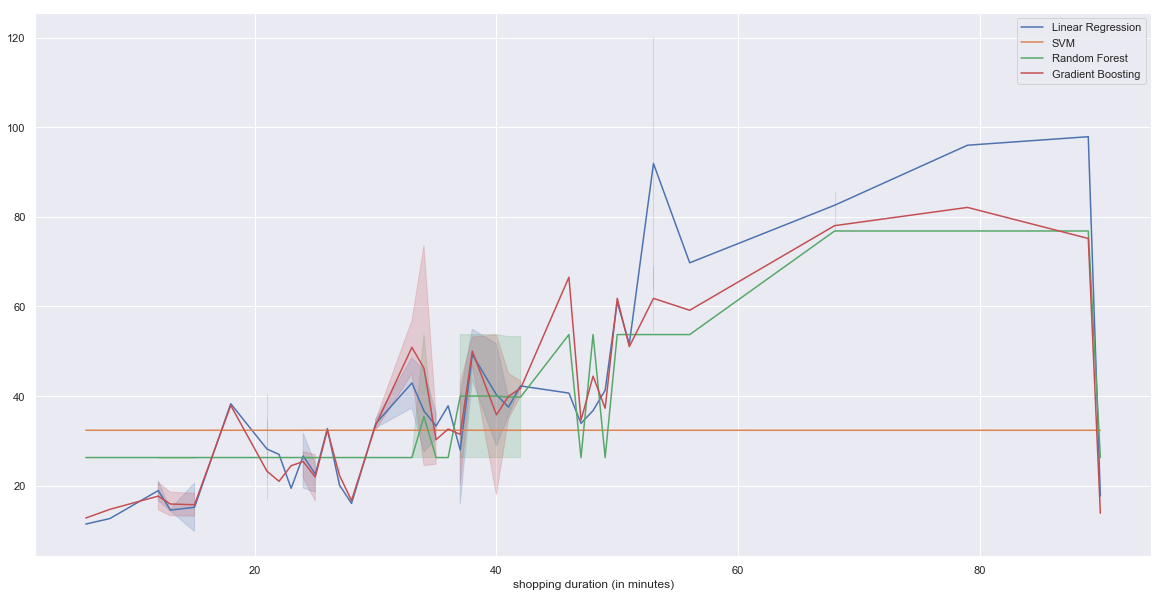

In [ ]:
#Compare

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(Y_test, Y_prediction_LR)
sns.lineplot(Y_test, Y_prediction_SVM)
sns.lineplot(Y_test, Y_prediction_RF)
sns.lineplot(Y_test, Y_prediction_GB)
plt.legend(["Linear Regression", "SVM", "Random Forest", "Gradient Boosting"])

SVM is not suitable for this data set. The accuracy for SVM is below 0, which is an underfitting. 
Other 3 algorithms do not show an accuracy of more than 25%
The main reason for this is as follows.
1. We have large amount of features.
2. The dataset is so small, only 165 instances.

# Predicting Shopping Amount

Multi Class Classification. 4 class. less, normal, bag full, heavy

# Machine Learning Approaches
1. Gradient Boosting Tree
2. Logistic Regression
3. Support Vector Machine
4. Random Forest
5. K-nn neighbors classifier
6. MLP Classifier

In [2]:
y_train = train['shopping_amount']
y_test = test['shopping_amount']

NameError: ignored

In [3]:
#Gradient Boosted Trees
model_gb = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
model_gb.fit(X_train, y_train)

NameError: ignored

In [ ]:
print("Training Accuracy: {:.3f}".format(model_gb.score(X_train, y_train)))
print("Testing Accuracy: {:.3f}".format(model_gb.score(X_test, y_test)))

In [ ]:
ytest = np.array(y_test)

In [ ]:
print(classification_report(ytest, model_gb.predict(X_test)))

In [ ]:
predictions_NN_prob1 = model_gb.predict(X_test)

In [ ]:
Y_prediction_gb = model_gb.predict(X_test)

In [ ]:
print(confusion_matrix(ytest, model_gb.predict(X_test)))

In [ ]:
#logistic regression
model= LogisticRegression(C=0.1)
model.fit(X_train, y_train)

In [ ]:
print("Training Acc: {:.4f}".format(model.score(X_train, y_train)))
print("Testing Acc: {:.4f}".format(model.score(X_test, y_test)))

In [ ]:
print(classification_report(ytest, model.predict(X_test)))

In [ ]:
print(confusion_matrix(ytest, model.predict(X_test)))

In [ ]:
#support vector machine
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
print(classification_report(ytest, svc.predict(X_test)))
print(confusion_matrix(ytest, svc.predict(X_test)))

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rm = RandomForestClassifier(min_samples_leaf=3, n_estimators=100, n_jobs=-1)
model_rm.fit(X_train, y_train)

In [ ]:
# Accuracy
print("Training Accuracy: {:.3f}".format(model_rm.score(X_train, y_train)))
print("Testing Accuracy: {:.3f}".format(model_rm.score(X_test, y_test)))

In [ ]:
print(classification_report(ytest, model_rm.predict(X_test)))
print(confusion_matrix(ytest, model_rm.predict(X_test)))

In [ ]:
#K-nn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on Testing set: {:.2f}'.format(knn.score(X_test, y_test)))

In [ ]:
print(classification_report(ytest, knn.predict(X_test)))
print(confusion_matrix(ytest, knn.predict(X_test)))

In [ ]:
#neural net
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on Testing set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
print(classification_report(ytest, mlp.predict(X_test)))
print(confusion_matrix(ytest, mlp.predict(X_test)))

In [ ]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print('')


print('')
#Logistic Regression
printmd("**Logistic Regression**")
print("Training Acc: {:.4f}".format(model.score(X_train, y_train)))
print("Testing Acc: {:.4f}".format(model.score(X_test, y_test)))
print('')
print(classification_report(ytest, model.predict(X_test)))


print('')
#Random Forest
printmd("**Random Forest**")
print("Training Acc: {:.3f}".format(model_rm.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(model_rm.score(X_test, y_test)))
print('')
print(classification_report(ytest, model_rm.predict(X_test)))

print('')
#Gradient Boosting
printmd("**Gradient Boosting**")
print("Training Acc: {:.3f}".format(model_gb.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(model_gb.score(X_test, y_test)))
print('')
print(classification_report(ytest, model_gb.predict(X_test)))

print('')
#Support Vector Machine
printmd("**Support Vector Machine**")
print("Training Acc: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(svc.score(X_test, y_test)))
print('')
print(classification_report(ytest, svc.predict(X_test)))

#K-nn neighbors classifier
printmd("**K-nn neighbors classifier**")
print("Training Acc: {:.3f}".format(
    knn.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(knn.score(X_test, y_test)))
print('')
print(classification_report(ytest, knn.predict(X_test)))

#MLP Classifier
printmd("**MLP Classifier**")
print("Training Acc: {:.3f}".format(
     mlp.score(X_train_scaled, y_train)))
print("Testing Acc: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print('')
print(classification_report(ytest, mlp.predict(X_test)))

SVM, MLP classifies over-fit the training dataset. Logistic regression and gradient boosting show good 
accuracy for training dataset. Gradient boosting provides highest accuracy for testing dataset. Overall 
Gradient Boosting and Random forest works better than other classifier. We can select ei-ther random forest 
or gradient boosting to predict shopping duration.


# File to Predict Shopping Duration

In [ ]:
import pickle
pickle.dump(RF, open('RF_duration.pkl','wb'))

In [ ]:
RF_duration = pickle.load(open('RF_duration.pkl','rb'))

# File to Predict Shopping Amount

In [ ]:
import pickle
pickle.dump(model_rm, open('RF_amount.pkl','wb'))

In [ ]:
RF_amount= pickle.load(open('RF_amount.pkl','rb'))

# Neural Network

# Predict Shopping Duration

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

1. Sequential model
2. 1 Input Layer
3. 1 Hidden Layer (16 neurons)
4. 1 Output Layer
5. relu Activation function
6. 200 epochs
7. 8 batch size

In [ ]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_train_t, Y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
116/116 [==============================] - 1s 12ms/step - loss: 1418.7767
Epoch 2/200
116/116 [==============================] - 0s 181us/step - loss: 1187.4792
Epoch 3/200
116/116 [==============================] - 0s 369us/step - loss: 1000.2265
Epoch 4/200
116/116 [==============================] - 0s 269us/step - loss: 843.8670
Epoch 5/200
116/116 [==============================] - 0s 269us/step - loss: 704.1648
Epoch 6/200
116/116 [==============================] - 0s 191us/step - loss: 583.0546
Epoch 7/200
116/116 [==============================] - 0s 269us/step - loss: 491.2213
Epoch 8/200
116/116 [==============================] - 0s 135us/step - loss: 431.6338
Epoch 9/200
116/116 [==============================] - 0s 326us/step - loss: 397.3153
Epoch 10/200
116/116 [==============================] - 0s 269us/step - loss: 380.3917
Epoch 11/200
116/116 [==============================] - 0s 269us/step - loss: 372.9510
Ep

116/116 [==============================] - 0s 224us/step - loss: 195.4329
Epoch 93/200
116/116 [==============================] - 0s 224us/step - loss: 194.5896
Epoch 94/200
116/116 [==============================] - 0s 198us/step - loss: 194.1761
Epoch 95/200
116/116 [==============================] - 0s 199us/step - loss: 193.6518
Epoch 96/200
116/116 [==============================] - 0s 135us/step - loss: 193.4063
Epoch 97/200
116/116 [==============================] - 0s 269us/step - loss: 192.6020
Epoch 98/200
116/116 [==============================] - 0s 204us/step - loss: 192.5783
Epoch 99/200
116/116 [==============================] - 0s 269us/step - loss: 191.7111
Epoch 100/200
116/116 [==============================] - 0s 135us/step - loss: 191.7430
Epoch 101/200
116/116 [==============================] - 0s 325us/step - loss: 190.8806
Epoch 102/200
116/116 [==============================] - 0s 135us/step - loss: 190.9351
Epoch 103/200
116/116 [==============================

116/116 [==============================] - 0s 269us/step - loss: 176.7129
Epoch 186/200
116/116 [==============================] - 0s 191us/step - loss: 176.6503
Epoch 187/200
116/116 [==============================] - 0s 269us/step - loss: 176.5884
Epoch 188/200
116/116 [==============================] - 0s 269us/step - loss: 176.5272
Epoch 189/200
116/116 [==============================] - 0s 191us/step - loss: 176.4668
Epoch 190/200
116/116 [==============================] - 0s 269us/step - loss: 176.4071
Epoch 191/200
116/116 [==============================] - 0s 269us/step - loss: 176.3481
Epoch 192/200
116/116 [==============================] - 0s 325us/step - loss: 176.2898
Epoch 193/200
116/116 [==============================] - 0s 269us/step - loss: 176.2322
Epoch 194/200
116/116 [==============================] - 0s 269us/step - loss: 176.1752
Epoch 195/200
116/116 [==============================] - 0s 269us/step - loss: 176.1278
Epoch 196/200
116/116 [=======================

In [ ]:
Y_prediction_test = model_lstm.predict(X_test_t)
print("Score:\t{:0.4f}".format(r2_score(Y_test, Y_prediction_test)))
r2_test = r2_score(Y_test, Y_prediction_test)

Score:	0.7117


In [ ]:
Y_prediction_test= model_lstm.predict(X_test_t)
Y_prediction_test

array([[26.10981 ],
       [24.334345],
       [36.983498],
       [21.379179],
       [33.14348 ],
       [55.10706 ],
       [20.37049 ],
       [18.40663 ],
       [23.423376],
       [34.340958],
       [37.65777 ],
       [27.10874 ],
       [20.75163 ],
       [48.63887 ],
       [25.022142],
       [24.937662],
       [35.297684],
       [64.14228 ],
       [26.802006],
       [29.240107],
       [27.812521],
       [30.419466],
       [24.44879 ],
       [20.18149 ],
       [41.06594 ],
       [61.834732],
       [19.245764],
       [74.48243 ],
       [27.501701],
       [27.160036],
       [73.73726 ],
       [25.19171 ],
       [22.79507 ],
       [36.939865],
       [25.482576],
       [35.331367],
       [40.280964],
       [28.856283],
       [56.21432 ],
       [31.458654],
       [37.669243],
       [29.014952],
       [40.606537],
       [69.642525],
       [79.40496 ],
       [78.470726],
       [34.7781  ],
       [66.97056 ],
       [33.418274]], dtype=float32)

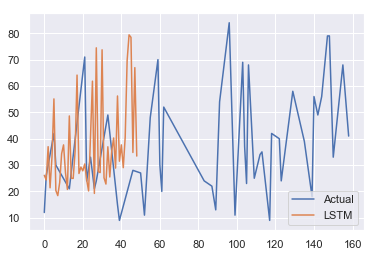

In [ ]:
plt.plot(Y_test[0:200])
plt.plot(Y_prediction_test[0:200])
plt.legend(["Actual", "LSTM"])

We also applied a simple LSTM architecture to the dataset to predict the shopping duration. We worked with a sequential model, 1 hidden layer (16 neurons), 1 output layer, relu activation function, 200 epochs. The accuracy is 0.7117 and now when we compare the result of LSTM with Random Forest we can see that LSTM gives a better result, but the main problem is that it gives a high loss value for each epoch.


# Predict Shopping Amount

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(16, input_shape=(1, X_train.shape[1]), activation='relu', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_train_t, y_train, epochs=200, batch_size=8, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/200
116/116 [==============================] - 1s 8ms/step - loss: 69.6038
Epoch 2/200
116/116 [==============================] - 0s 269us/step - loss: 27.9480
Epoch 3/200
116/116 [==============================] - 0s 325us/step - loss: 14.4050
Epoch 4/200
116/116 [==============================] - 0s 269us/step - loss: 9.2069
Epoch 5/200
116/116 [==============================] - 0s 269us/step - loss: 6.8849
Epoch 6/200
116/116 [==============================] - 0s 191us/step - loss: 5.5853
Epoch 7/200
116/116 [==============================] - 0s 393us/step - loss: 4.6032
Epoch 8/200
116/116 [==============================] - 0s 292us/step - loss: 4.2082
Epoch 9/200
116/116 [==============================] - 0s 241us/step - loss: 3.8710
Epoch 10/200
116/116 [==============================] - 0s 241us/step - loss: 3.6523
Epoch 11/200
116/116 [==============================] - 0s 318us/step - loss: 3.4763
Epoch 12/200
116/116 [==============================] - 0s 275us/step - l

116/116 [==============================] - 0s 191us/step - loss: 0.9232
Epoch 98/200
116/116 [==============================] - 0s 269us/step - loss: 0.9224
Epoch 99/200
116/116 [==============================] - 0s 135us/step - loss: 0.9217
Epoch 100/200
116/116 [==============================] - 0s 269us/step - loss: 0.9209
Epoch 101/200
116/116 [==============================] - 0s 191us/step - loss: 0.9202
Epoch 102/200
116/116 [==============================] - 0s 135us/step - loss: 0.9195
Epoch 103/200
116/116 [==============================] - 0s 269us/step - loss: 0.9188
Epoch 104/200
116/116 [==============================] - 0s 269us/step - loss: 0.9181
Epoch 105/200
116/116 [==============================] - 0s 191us/step - loss: 0.9174
Epoch 106/200
116/116 [==============================] - 0s 135us/step - loss: 0.9167
Epoch 107/200
116/116 [==============================] - 0s 269us/step - loss: 0.9161
Epoch 108/200
116/116 [==============================] - 0s 135us/step

116/116 [==============================] - 0s 269us/step - loss: 0.8797
Epoch 193/200
116/116 [==============================] - 0s 269us/step - loss: 0.8794
Epoch 194/200
116/116 [==============================] - 0s 269us/step - loss: 0.8791
Epoch 195/200
116/116 [==============================] - 0s 191us/step - loss: 0.8788
Epoch 196/200
116/116 [==============================] - 0s 135us/step - loss: 0.8785
Epoch 197/200
116/116 [==============================] - 0s 269us/step - loss: 0.8782
Epoch 198/200
116/116 [==============================] - 0s 269us/step - loss: 0.8779
Epoch 199/200
116/116 [==============================] - 0s 191us/step - loss: 0.8776
Epoch 200/200
116/116 [==============================] - 0s 269us/step - loss: 0.8773


In [ ]:
Y_prediction_test = model_lstm.predict(X_test_t)
print("Score:\t{:0.4f}".format(r2_score(Y_test, Y_prediction_test)))
r2_test = r2_score(Y_test, Y_prediction_test)

Score:	-3.0184


we get a very poor result with this LSTM for shopping amoung identification which is not acceptable. 
Now, we try to improve the Neural net model for shopping amount.

# Improve Neural Net for Shopping Amount

In [ ]:
#Preprocessed dataset made for predicting amount
dataset = pd.read_csv('dSetShuffled.csv')

In [ ]:
Dup = dataset[dataset.duplicated()]
Dup

,Unnamed: 0,Unnamed: 0.1,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax


In [ ]:
dataset = dataset.drop(columns='Unnamed: 0')
dataset = dataset.drop(columns='Unnamed: 0.1')

In [ ]:
DSOutput = dataset['shopping_amount']
DSInput = dataset.drop(columns='shopping_amount')

In [ ]:
dataset.head()

,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,shopping_frequency,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
0,61,0,20.0,8.0,0.0,2,20,0,0,1,...,3,0,100,63,91,16,61,1,19,0
1,55,0,30.0,7.0,2.0,0,23,0,0,0,...,0,0,115,71,95,8,72,4,12,0
2,33,1,27.7,6.0,8.0,0,19,0,0,1,...,1,0,119,86,113,16,64,1,20,0
3,60,1,22.7,6.0,5.0,2,19,0,0,1,...,4,0,103,70,101,12,58,5,15,0
4,26,0,27.7,7.0,1.5,0,17,1,4,1,...,5,0,124,66,129,12,67,14,51,1


In [ ]:
DSOutput = np.array(DSOutput)
DSInput = np.array(DSInput)
DSOutput = np.array(DSOutput)
DSInput = np.array(DSInput)

In [ ]:
testSplit = 10
dataSize = DSOutput.size
TrainOutput = DSOutput[0:(dataSize - testSplit)]
TrainInput = DSInput[0:(dataSize - testSplit)]
TestOutput = DSOutput[(dataSize - testSplit):,]
TestInput = DSInput[(dataSize - testSplit):,]

In [ ]:
#Architecture
model = Sequential()
model.add(Dense(32, input_dim=21, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
path_checkpoint = 'newVolunteer_1_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='accuracy',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [ ]:
callback_early_stopping = EarlyStopping(monitor='accuracy',
                                        patience=10, verbose=1)
callback_tensorboard = TensorBoard(log_dir='./newVolunteer_logs/',
                                   histogram_freq=0,
                                   write_graph=False)
callbacks = [callback_early_stopping]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical
TrainOutputBinary = to_categorical(TrainOutput)
TestOutputBinary = to_categorical(TestOutput)

In [ ]:
TestOutputBinary

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [ ]:
model.fit(TrainInput, TrainOutputBinary, epochs=1000, validation_split=0.15, batch_size=50, shuffle=True)

Train on 131 samples, validate on 24 samples
Epoch 1/1000
131/131 [==============================] - 0s 53us/step - loss: 5.1950 - acc: 0.6794 - val_loss: 8.5195 - val_acc: 0.3333
Epoch 2/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1961 - acc: 0.6794 - val_loss: 8.5072 - val_acc: 0.3333
Epoch 3/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1942 - acc: 0.6794 - val_loss: 8.5539 - val_acc: 0.3333
Epoch 4/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1958 - acc: 0.6794 - val_loss: 8.5764 - val_acc: 0.3333
Epoch 5/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1944 - acc: 0.6794 - val_loss: 8.5276 - val_acc: 0.3333
Epoch 6/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1947 - acc: 0.6794 - val_loss: 8.5766 - val_acc: 0.3333
Epoch 7/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1948 - acc: 0.6794 - val_loss: 8.6166 - val_acc: 0.2917
Epoch 8/10

131/131 [==============================] - 0s 91us/step - loss: 5.1880 - acc: 0.6794 - val_loss: 8.6571 - val_acc: 0.2917
Epoch 61/1000
131/131 [==============================] - 0s 92us/step - loss: 5.1865 - acc: 0.6794 - val_loss: 8.7006 - val_acc: 0.2917
Epoch 62/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1875 - acc: 0.6794 - val_loss: 8.6579 - val_acc: 0.2917
Epoch 63/1000
131/131 [==============================] - 0s 114us/step - loss: 5.1872 - acc: 0.6794 - val_loss: 8.6232 - val_acc: 0.3333
Epoch 64/1000
131/131 [==============================] - 0s 84us/step - loss: 5.1860 - acc: 0.6794 - val_loss: 8.6720 - val_acc: 0.2917
Epoch 65/1000
131/131 [==============================] - 0s 69us/step - loss: 5.1873 - acc: 0.6794 - val_loss: 8.6918 - val_acc: 0.2917
Epoch 66/1000
131/131 [==============================] - 0s 53us/step - loss: 5.1863 - acc: 0.6794 - val_loss: 8.6356 - val_acc: 0.2917
Epoch 67/1000
131/131 [==============================] - 0s 5

131/131 [==============================] - 0s 38us/step - loss: 5.1816 - acc: 0.6794 - val_loss: 8.7457 - val_acc: 0.2917
Epoch 121/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1813 - acc: 0.6794 - val_loss: 8.7550 - val_acc: 0.2917
Epoch 122/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1814 - acc: 0.6794 - val_loss: 8.7183 - val_acc: 0.2917
Epoch 123/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1815 - acc: 0.6794 - val_loss: 8.7343 - val_acc: 0.2917
Epoch 124/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1811 - acc: 0.6794 - val_loss: 8.7686 - val_acc: 0.2917
Epoch 125/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1811 - acc: 0.6794 - val_loss: 8.7872 - val_acc: 0.2917
Epoch 126/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1811 - acc: 0.6794 - val_loss: 8.7599 - val_acc: 0.2917
Epoch 127/1000
131/131 [==============================] 

Epoch 180/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1775 - acc: 0.6794 - val_loss: 8.8267 - val_acc: 0.2917
Epoch 181/1000
131/131 [==============================] - 0s 53us/step - loss: 5.1773 - acc: 0.6794 - val_loss: 8.8438 - val_acc: 0.2917
Epoch 182/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1773 - acc: 0.6794 - val_loss: 8.8537 - val_acc: 0.2917
Epoch 183/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1775 - acc: 0.6794 - val_loss: 8.8460 - val_acc: 0.2917
Epoch 184/1000
131/131 [==============================] - 0s 69us/step - loss: 5.1772 - acc: 0.6794 - val_loss: 8.8374 - val_acc: 0.2917
Epoch 185/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1776 - acc: 0.6794 - val_loss: 8.8269 - val_acc: 0.2917
Epoch 186/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1773 - acc: 0.6794 - val_loss: 8.8531 - val_acc: 0.2917
Epoch 187/1000
131/131 [=================

Epoch 240/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1752 - acc: 0.6794 - val_loss: 8.8939 - val_acc: 0.2917
Epoch 241/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1752 - acc: 0.6794 - val_loss: 8.9376 - val_acc: 0.2917
Epoch 242/1000
131/131 [==============================] - 0s 54us/step - loss: 5.1751 - acc: 0.6794 - val_loss: 8.9632 - val_acc: 0.2917
Epoch 243/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1751 - acc: 0.6794 - val_loss: 8.9593 - val_acc: 0.2917
Epoch 244/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1752 - acc: 0.6794 - val_loss: 8.9148 - val_acc: 0.2917
Epoch 245/1000
131/131 [==============================] - 0s 69us/step - loss: 5.1750 - acc: 0.6794 - val_loss: 8.9159 - val_acc: 0.2917
Epoch 246/1000
131/131 [==============================] - 0s 53us/step - loss: 5.1749 - acc: 0.6794 - val_loss: 8.9140 - val_acc: 0.2917
Epoch 247/1000
131/131 [=================

Epoch 300/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1734 - acc: 0.6794 - val_loss: 8.9650 - val_acc: 0.2917
Epoch 301/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1736 - acc: 0.6794 - val_loss: 8.9803 - val_acc: 0.2917
Epoch 302/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1734 - acc: 0.6794 - val_loss: 9.0251 - val_acc: 0.2917
Epoch 303/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1736 - acc: 0.6794 - val_loss: 9.0370 - val_acc: 0.2917
Epoch 304/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1736 - acc: 0.6794 - val_loss: 8.9708 - val_acc: 0.2917
Epoch 305/1000
131/131 [==============================] - 0s 69us/step - loss: 5.1734 - acc: 0.6794 - val_loss: 8.9693 - val_acc: 0.2917
Epoch 306/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1733 - acc: 0.6794 - val_loss: 8.9957 - val_acc: 0.2917
Epoch 307/1000
131/131 [=================

Epoch 360/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1722 - acc: 0.6794 - val_loss: 9.0726 - val_acc: 0.2917
Epoch 361/1000
131/131 [==============================] - 0s 30us/step - loss: 5.1723 - acc: 0.6794 - val_loss: 9.0492 - val_acc: 0.2917
Epoch 362/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1722 - acc: 0.6794 - val_loss: 9.0322 - val_acc: 0.2917
Epoch 363/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1722 - acc: 0.6794 - val_loss: 9.0468 - val_acc: 0.2917
Epoch 364/1000
131/131 [==============================] - 0s 53us/step - loss: 5.1723 - acc: 0.6794 - val_loss: 9.0653 - val_acc: 0.2917
Epoch 365/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1722 - acc: 0.6794 - val_loss: 9.0677 - val_acc: 0.2917
Epoch 366/1000
131/131 [==============================] - 0s 30us/step - loss: 5.1722 - acc: 0.6794 - val_loss: 9.0432 - val_acc: 0.2917
Epoch 367/1000
131/131 [=================

Epoch 420/1000
131/131 [==============================] - 0s 69us/step - loss: 5.1715 - acc: 0.6794 - val_loss: 9.1085 - val_acc: 0.2917
Epoch 421/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1714 - acc: 0.6794 - val_loss: 9.1159 - val_acc: 0.2917
Epoch 422/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1713 - acc: 0.6794 - val_loss: 9.1350 - val_acc: 0.2917
Epoch 423/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1714 - acc: 0.6794 - val_loss: 9.1335 - val_acc: 0.2917
Epoch 424/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1713 - acc: 0.6794 - val_loss: 9.0982 - val_acc: 0.2917
Epoch 425/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1714 - acc: 0.6794 - val_loss: 9.0967 - val_acc: 0.2917
Epoch 426/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1712 - acc: 0.6794 - val_loss: 9.1389 - val_acc: 0.2917
Epoch 427/1000
131/131 [=================

Epoch 480/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1707 - acc: 0.6794 - val_loss: 9.1841 - val_acc: 0.2917
Epoch 481/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1708 - acc: 0.6794 - val_loss: 9.1826 - val_acc: 0.2917
Epoch 482/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1708 - acc: 0.6794 - val_loss: 9.2245 - val_acc: 0.2917
Epoch 483/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1707 - acc: 0.6794 - val_loss: 9.2162 - val_acc: 0.2917
Epoch 484/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1708 - acc: 0.6794 - val_loss: 9.1695 - val_acc: 0.2917
Epoch 485/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1706 - acc: 0.6794 - val_loss: 9.1534 - val_acc: 0.2917
Epoch 486/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1707 - acc: 0.6794 - val_loss: 9.1449 - val_acc: 0.2917
Epoch 487/1000
131/131 [====================

Epoch 540/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1701 - acc: 0.6794 - val_loss: 9.2319 - val_acc: 0.2917
Epoch 541/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1701 - acc: 0.6794 - val_loss: 9.2114 - val_acc: 0.2917
Epoch 542/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1702 - acc: 0.6794 - val_loss: 9.2046 - val_acc: 0.2917
Epoch 543/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1701 - acc: 0.6794 - val_loss: 9.2200 - val_acc: 0.2917
Epoch 544/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1701 - acc: 0.6794 - val_loss: 9.2146 - val_acc: 0.2917
Epoch 545/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1701 - acc: 0.6794 - val_loss: 9.2311 - val_acc: 0.2917
Epoch 546/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1701 - acc: 0.6794 - val_loss: 9.2478 - val_acc: 0.2917
Epoch 547/1000
131/131 [==================

Epoch 600/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1697 - acc: 0.6794 - val_loss: 9.2882 - val_acc: 0.2917
Epoch 601/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1697 - acc: 0.6794 - val_loss: 9.3024 - val_acc: 0.2917
Epoch 602/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1697 - acc: 0.6794 - val_loss: 9.3110 - val_acc: 0.2917
Epoch 603/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1697 - acc: 0.6794 - val_loss: 9.3052 - val_acc: 0.2917
Epoch 604/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1697 - acc: 0.6794 - val_loss: 9.2905 - val_acc: 0.2917
Epoch 605/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1697 - acc: 0.6794 - val_loss: 9.2955 - val_acc: 0.2917
Epoch 606/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1697 - acc: 0.6794 - val_loss: 9.2856 - val_acc: 0.2917
Epoch 607/1000
131/131 [====================

Epoch 660/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1694 - acc: 0.6794 - val_loss: 9.3383 - val_acc: 0.2917
Epoch 661/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1694 - acc: 0.6794 - val_loss: 9.3491 - val_acc: 0.2917
Epoch 662/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1694 - acc: 0.6794 - val_loss: 9.3404 - val_acc: 0.2917
Epoch 663/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1694 - acc: 0.6794 - val_loss: 9.3105 - val_acc: 0.2917
Epoch 664/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1694 - acc: 0.6794 - val_loss: 9.3038 - val_acc: 0.2917
Epoch 665/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1694 - acc: 0.6794 - val_loss: 9.3228 - val_acc: 0.2917
Epoch 666/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1694 - acc: 0.6794 - val_loss: 9.3448 - val_acc: 0.2917
Epoch 667/1000
131/131 [==================

131/131 [==============================] - 0s 0us/step - loss: 5.1691 - acc: 0.6794 - val_loss: 9.4119 - val_acc: 0.2917
Epoch 720/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1691 - acc: 0.6794 - val_loss: 9.3964 - val_acc: 0.2917
Epoch 721/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1691 - acc: 0.6794 - val_loss: 9.3893 - val_acc: 0.2917
Epoch 722/1000
131/131 [==============================] - 0s 119us/step - loss: 5.1691 - acc: 0.6794 - val_loss: 9.3942 - val_acc: 0.2917
Epoch 723/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1691 - acc: 0.6794 - val_loss: 9.3980 - val_acc: 0.2917
Epoch 724/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1691 - acc: 0.6794 - val_loss: 9.3729 - val_acc: 0.2917
Epoch 725/1000
131/131 [==============================] - 0s 0us/step - loss: 5.1691 - acc: 0.6794 - val_loss: 9.3796 - val_acc: 0.2917
Epoch 726/1000
131/131 [==============================] - 0

Epoch 779/1000
131/131 [==============================] - 0s 170us/step - loss: 5.1689 - acc: 0.6794 - val_loss: 9.4124 - val_acc: 0.2917
Epoch 780/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1689 - acc: 0.6794 - val_loss: 9.4105 - val_acc: 0.2917
Epoch 781/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1689 - acc: 0.6794 - val_loss: 9.4290 - val_acc: 0.2917
Epoch 782/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1689 - acc: 0.6794 - val_loss: 9.4250 - val_acc: 0.2917
Epoch 783/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1689 - acc: 0.6794 - val_loss: 9.4456 - val_acc: 0.2917
Epoch 784/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1689 - acc: 0.6794 - val_loss: 9.4528 - val_acc: 0.2917
Epoch 785/1000
131/131 [==============================] - 0s 30us/step - loss: 5.1689 - acc: 0.6794 - val_loss: 9.4444 - val_acc: 0.2917
Epoch 786/1000
131/131 [================

Epoch 839/1000
131/131 [==============================] - 0s 45us/step - loss: 5.1687 - acc: 0.6794 - val_loss: 9.4600 - val_acc: 0.2917
Epoch 840/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1687 - acc: 0.6794 - val_loss: 9.4521 - val_acc: 0.2917
Epoch 841/1000
131/131 [==============================] - 0s 69us/step - loss: 5.1687 - acc: 0.6794 - val_loss: 9.4476 - val_acc: 0.2917
Epoch 842/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1687 - acc: 0.6794 - val_loss: 9.4519 - val_acc: 0.2917
Epoch 843/1000
131/131 [==============================] - 0s 53us/step - loss: 5.1687 - acc: 0.6794 - val_loss: 9.4544 - val_acc: 0.2917
Epoch 844/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1687 - acc: 0.6794 - val_loss: 9.4642 - val_acc: 0.2917
Epoch 845/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1687 - acc: 0.6794 - val_loss: 9.4795 - val_acc: 0.2917
Epoch 846/1000
131/131 [=================

131/131 [==============================] - 0s 38us/step - loss: 5.1686 - acc: 0.6794 - val_loss: 9.4913 - val_acc: 0.2917
Epoch 899/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1686 - acc: 0.6794 - val_loss: 9.4983 - val_acc: 0.2917
Epoch 900/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1686 - acc: 0.6794 - val_loss: 9.4975 - val_acc: 0.2917
Epoch 901/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1686 - acc: 0.6794 - val_loss: 9.4863 - val_acc: 0.2917
Epoch 902/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1686 - acc: 0.6794 - val_loss: 9.4746 - val_acc: 0.2917
Epoch 903/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1686 - acc: 0.6794 - val_loss: 9.4918 - val_acc: 0.2917
Epoch 904/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1685 - acc: 0.6794 - val_loss: 9.4898 - val_acc: 0.2917
Epoch 905/1000
131/131 [==============================] 

Epoch 958/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1684 - acc: 0.6794 - val_loss: 9.5238 - val_acc: 0.2917
Epoch 959/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1684 - acc: 0.6794 - val_loss: 9.5043 - val_acc: 0.2917
Epoch 960/1000
131/131 [==============================] - 0s 46us/step - loss: 5.1684 - acc: 0.6794 - val_loss: 9.4952 - val_acc: 0.2917
Epoch 961/1000
131/131 [==============================] - 0s 53us/step - loss: 5.1684 - acc: 0.6794 - val_loss: 9.5090 - val_acc: 0.2917
Epoch 962/1000
131/131 [==============================] - 0s 30us/step - loss: 5.1684 - acc: 0.6794 - val_loss: 9.5199 - val_acc: 0.2917
Epoch 963/1000
131/131 [==============================] - 0s 61us/step - loss: 5.1684 - acc: 0.6794 - val_loss: 9.5356 - val_acc: 0.2917
Epoch 964/1000
131/131 [==============================] - 0s 38us/step - loss: 5.1684 - acc: 0.6794 - val_loss: 9.5350 - val_acc: 0.2917
Epoch 965/1000
131/131 [=================

In [ ]:
_, accuracy = model.evaluate(TrainInput, TrainOutputBinary)
print('Accuracy: %.2f' % (accuracy*100))

155/155 [==============================] - 0s 39us/step
Accuracy: 61.94


Now we get better result for shopping amount.

We applied the same neural net architecture (shopping duration) to predict shopping amount but 
we received poor accuracy. To get the good accuracy result, we re-model the architecture with 
4 Layer RNN, loss='categorical_crossentropy', optimizer='adam', epochs=1000, valida-tion_split=0.15,
batch_size=50 and received 61.94% accuracy. 